## Logistic Regression

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn; seaborn.set()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Visualizing the data

(100, 3)


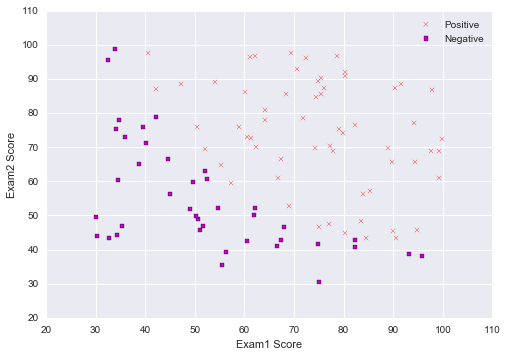

In [3]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')

print(data.shape)

pos = data[data[:,-1]==1] # extract positive samples
neg = data[data[:,-1]==0] # extract negative samples

ax = plt.axes()
ax.scatter(pos[:,0], pos[:,1], c='r', marker="x", label='Positive');
ax.scatter(neg[:,0], neg[:,1], c='m', marker="s", label='Negative');
ax.set_xlabel("Exam1 Score")
ax.set_ylabel("Exam2 Score")
ax.legend();

### Initialize Parameters

In [4]:
# Get the dataset shape
m, n  = data.shape[0], data.shape[1] - 1

# Add an additional column to the feature set
X = np.c_[ np.ones((m, 1)), data[:, :n] ]

# Extract the labels
y = data[:, n:n+1]

theta = np.zeros( (n+1, 1) ) 

#### Sigmoid function

The logistic regression cost function is defined as $h_{\theta}(x) = g(\theta^T x)$ where the function g is the sigmoid function, which is defined as: $g(z) = \frac{1}{1+e^{-z}}$

In [7]:
import scipy.special

def sigmoid(z):
    return scipy.special.expit(z)
    
sigmoid(np.array([0,0,0]))

array([ 0.5,  0.5,  0.5])

#### Cost function

The cost function is defined as:

$J(\theta) = \frac{1}{m} \sum_{n=1}^{m} [-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$

In [8]:
def compute_cost(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X.dot( theta ))
    term1 = np.log( h ).T.dot( -y )
    term2 = np.log(1 - h).T.dot(1 - y)
    return np.sum(((term1 - term2) / m))

compute_cost(theta, X, y)

0.69314718055994518

#### Gradient

The gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for j = 0,1,...,n) is defined as follows:

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{n=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$

In [11]:
def gradient_cost(X, y, theta):
    m = X.shape[0]
    return ( X.T.dot(sigmoid( X.dot( theta ) ) - y)  ) / m

gradient_cost(X, y, theta)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

#### Learning parameters

In [12]:
import scipy.optimize #python equivalent of fminunc in Octave/Matlab

def fit(theta, X, y, num_iter):
    result = scipy.optimize.fmin( compute_cost, x0=theta, args=(X, y), maxiter=num_iter, full_output=True )
    return result[0], result[1]

theta, cost = fit(theta, X, y, 200)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


#### Plotting the decision boundary


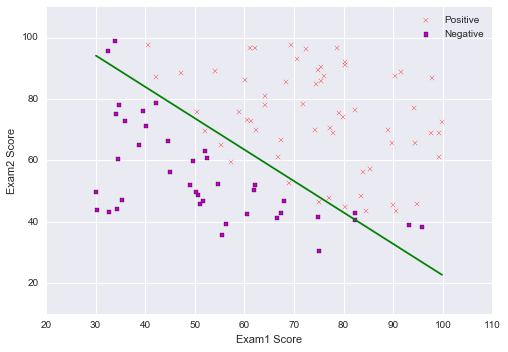

In [13]:
plot_x = np.array([min(X[:,1]), max(X[:,1])]) #find minimum and maximum x-value
plot_y = (-1./ theta[2]) * (theta[1] * plot_x + theta[0]) #predict y-value for x-values

ax = plt.axes()
ax.scatter(pos[:,0], pos[:,1], c='r', marker="x", label='Positive');
ax.scatter(neg[:,0], neg[:,1], c='m', marker="s", label='Negative');
ax.plot(plot_x, plot_y, color='g');
ax.set_xlabel("Exam1 Score")
ax.set_ylabel("Exam2 Score")
ax.legend();

#### Predicting new values

In [14]:
def predict(X, theta, binary=True):
    p = sigmoid(theta.dot(X))
    if binary:
        return 1 if p > 0.5 else 0
    else:
        return p
    
test = np.array([1, 45, 85])
predict(test, theta, binary=False), (predict(test, theta))

(0.77629159041124107, 1)